
# Predicting Thyroid Disease Recurrence Using Machine Learning Models
    


## Introduction

This project aims to predict the recurrence of thyroid disease using various machine learning algorithms. The dataset contains 13 clinicopathologic features, and we explore multiple models including Logistic Regression, Naive Bayes, SVM, and K-Nearest Neighbors. Our goal is to compare the performance of these models and identify the best predictor for thyroid disease recurrence.

## Objective

- To preprocess and visualize clinical data.
- To train and test machine learning models on the dataset.
- To evaluate and compare the performance of models using accuracy, confusion matrix, and classification report.
    

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

This data set contains 13 clinicopathologic features aiming to predict recurrence of well differentiated thyroid cancer. The data set was collected in duration of 15 years and each patient was followed for at least 10 years.


In [30]:
Data=pd.read_csv(r"D:\DataScience\DS_DATA_SETS\DS_DATA_SETS\ML\Thyroid_Diff.csv")


## Data Preprocessing

The dataset needs to be preprocessed before applying machine learning models. In this section, we handle missing values, analyze unique values in categorical features, and transform categorical data into numerical using one-hot encoding.
    

Content The size for the file featured within this Kaggle dataset is shown below — along with a list of attributes, and their description summaries:

Age: The age of the patient at the time of diagnosis or treatment.

Gender: The gender of the patient (male or female).

Smoking: Whether the patient is a smoker or not.

Hx Smoking: Smoking history of the patient (e.g., whether they have ever smoked).

Hx Radiotherapy: History of radiotherapy treatment for any condition.

Thyroid Function: The status of thyroid function, possibly indicating if there are any abnormalities.

Physical Examination: Findings from a physical examination of the patient, which may include palpation of the thyroid gland and surrounding structures.

Adenopathy: Presence or absence of enlarged lymph nodes (adenopathy) in the neck region.

Pathology: Specific types of thyroid cancer as determined by pathology examination of biopsy samples.

Focality: Whether the cancer is unifocal (limited to one location) or multifocal (present in multiple locations).

Risk: The risk category of the cancer based on various factors, such as tumor size, extent of spread, and histological type.

T: Tumor classification based on its size and extent of invasion into nearby structures.

N: Nodal classification indicating the involvement of lymph nodes.

M: Metastasis classification indicating the presence or absence of distant metastases.

Stage: The overall stage of the cancer, typically determined by combining T, N, and M classifications.

Response: Response to treatment, indicating whether the cancer responded positively, negatively, or remained stable after 
treatment.

Recurred: Indicates whether the cancer has recurred after initial treatment.

In [31]:
Data

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [32]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [33]:
Data["Thyroid Function"].unique()

array(['Euthyroid', 'Clinical Hyperthyroidism', 'Clinical Hypothyroidism',
       'Subclinical Hyperthyroidism', 'Subclinical Hypothyroidism'],
      dtype=object)

In [34]:
Data["Physical Examination"].unique()

array(['Single nodular goiter-left', 'Multinodular goiter',
       'Single nodular goiter-right', 'Normal', 'Diffuse goiter'],
      dtype=object)

In [35]:
Data["Adenopathy"].unique()

array(['No', 'Right', 'Extensive', 'Left', 'Bilateral', 'Posterior'],
      dtype=object)

In [36]:
for column in Data.columns:
    unique_values=Data[column].unique()
    print(f"*'{column}': {unique_values} \n\n-------------\n")

*'Age': [27 34 30 62 52 41 46 51 40 75 59 49 50 76 42 44 43 36 70 60 33 26 37 55
 31 45 20 38 29 25 21 23 24 35 54 22 69 28 17 73 18 39 57 66 32 47 56 63
 19 67 72 61 68 48 81 53 58 80 79 65 15 82 71 64 78] 

-------------

*'Gender': ['F' 'M'] 

-------------

*'Smoking': ['No' 'Yes'] 

-------------

*'Hx Smoking': ['No' 'Yes'] 

-------------

*'Hx Radiothreapy': ['No' 'Yes'] 

-------------

*'Thyroid Function': ['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism'] 

-------------

*'Physical Examination': ['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter'] 

-------------

*'Adenopathy': ['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior'] 

-------------

*'Pathology': ['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell'] 

-------------

*'Focality': ['Uni-Focal' 'Multi-Focal'] 

-------------

*'Risk': ['Low' 'Intermediate' 'High'] 

-----

In [37]:
Data.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

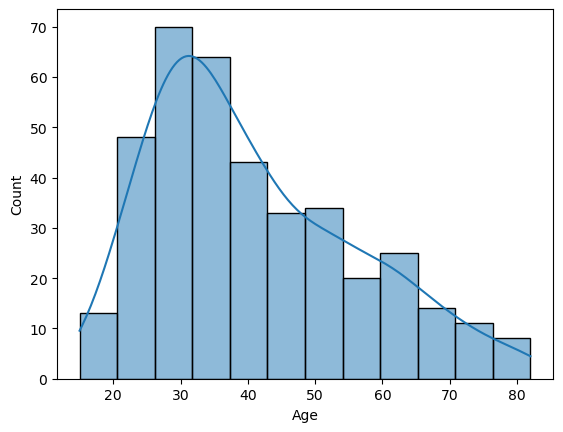

In [38]:
sns.histplot(Data['Age'],kde=True)

In [39]:
Data.head(5)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


Text(0.5, 1.0, 'Count of the patients in Different Risk levels')

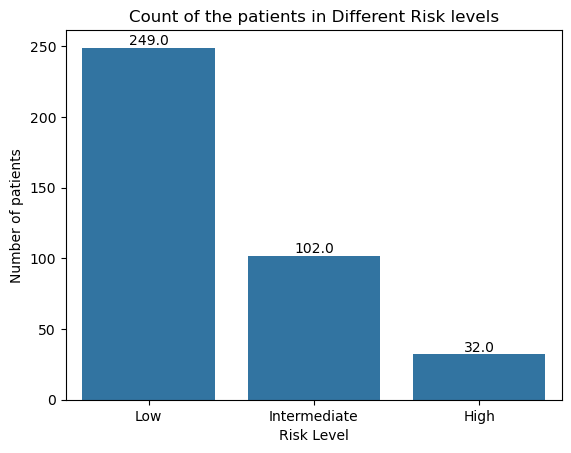

In [40]:
sns.countplot(x='Risk',data=Data)

ax=plt.gca()

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='bottom')
    
plt.xlabel("Risk Level")
plt.ylabel("Number of patients")
plt.title("Count of the patients in Different Risk levels")

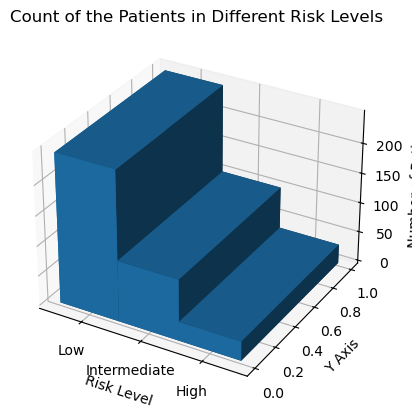

In [41]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'Data' is your DataFrame and 'Risk' is the column of interest
data_counts = Data['Risk'].value_counts()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_pos = np.arange(len(data_counts))
y_pos = np.zeros_like(x_pos)
z_pos = np.zeros_like(x_pos)
dx = np.ones_like(x_pos)
dy = np.ones_like(x_pos)
dz = data_counts.values

ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz)

ax.set_xlabel('Risk Level')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Number of Patients')
ax.set_title('Count of the Patients in Different Risk Levels')

# Set x-ticks in the middle of the bars
ax.set_xticks(x_pos + dx / 2)
ax.set_xticklabels(data_counts.index)

plt.show()


In [42]:
imp=pd.get_dummies(Data,drop_first=True)

<Axes: >

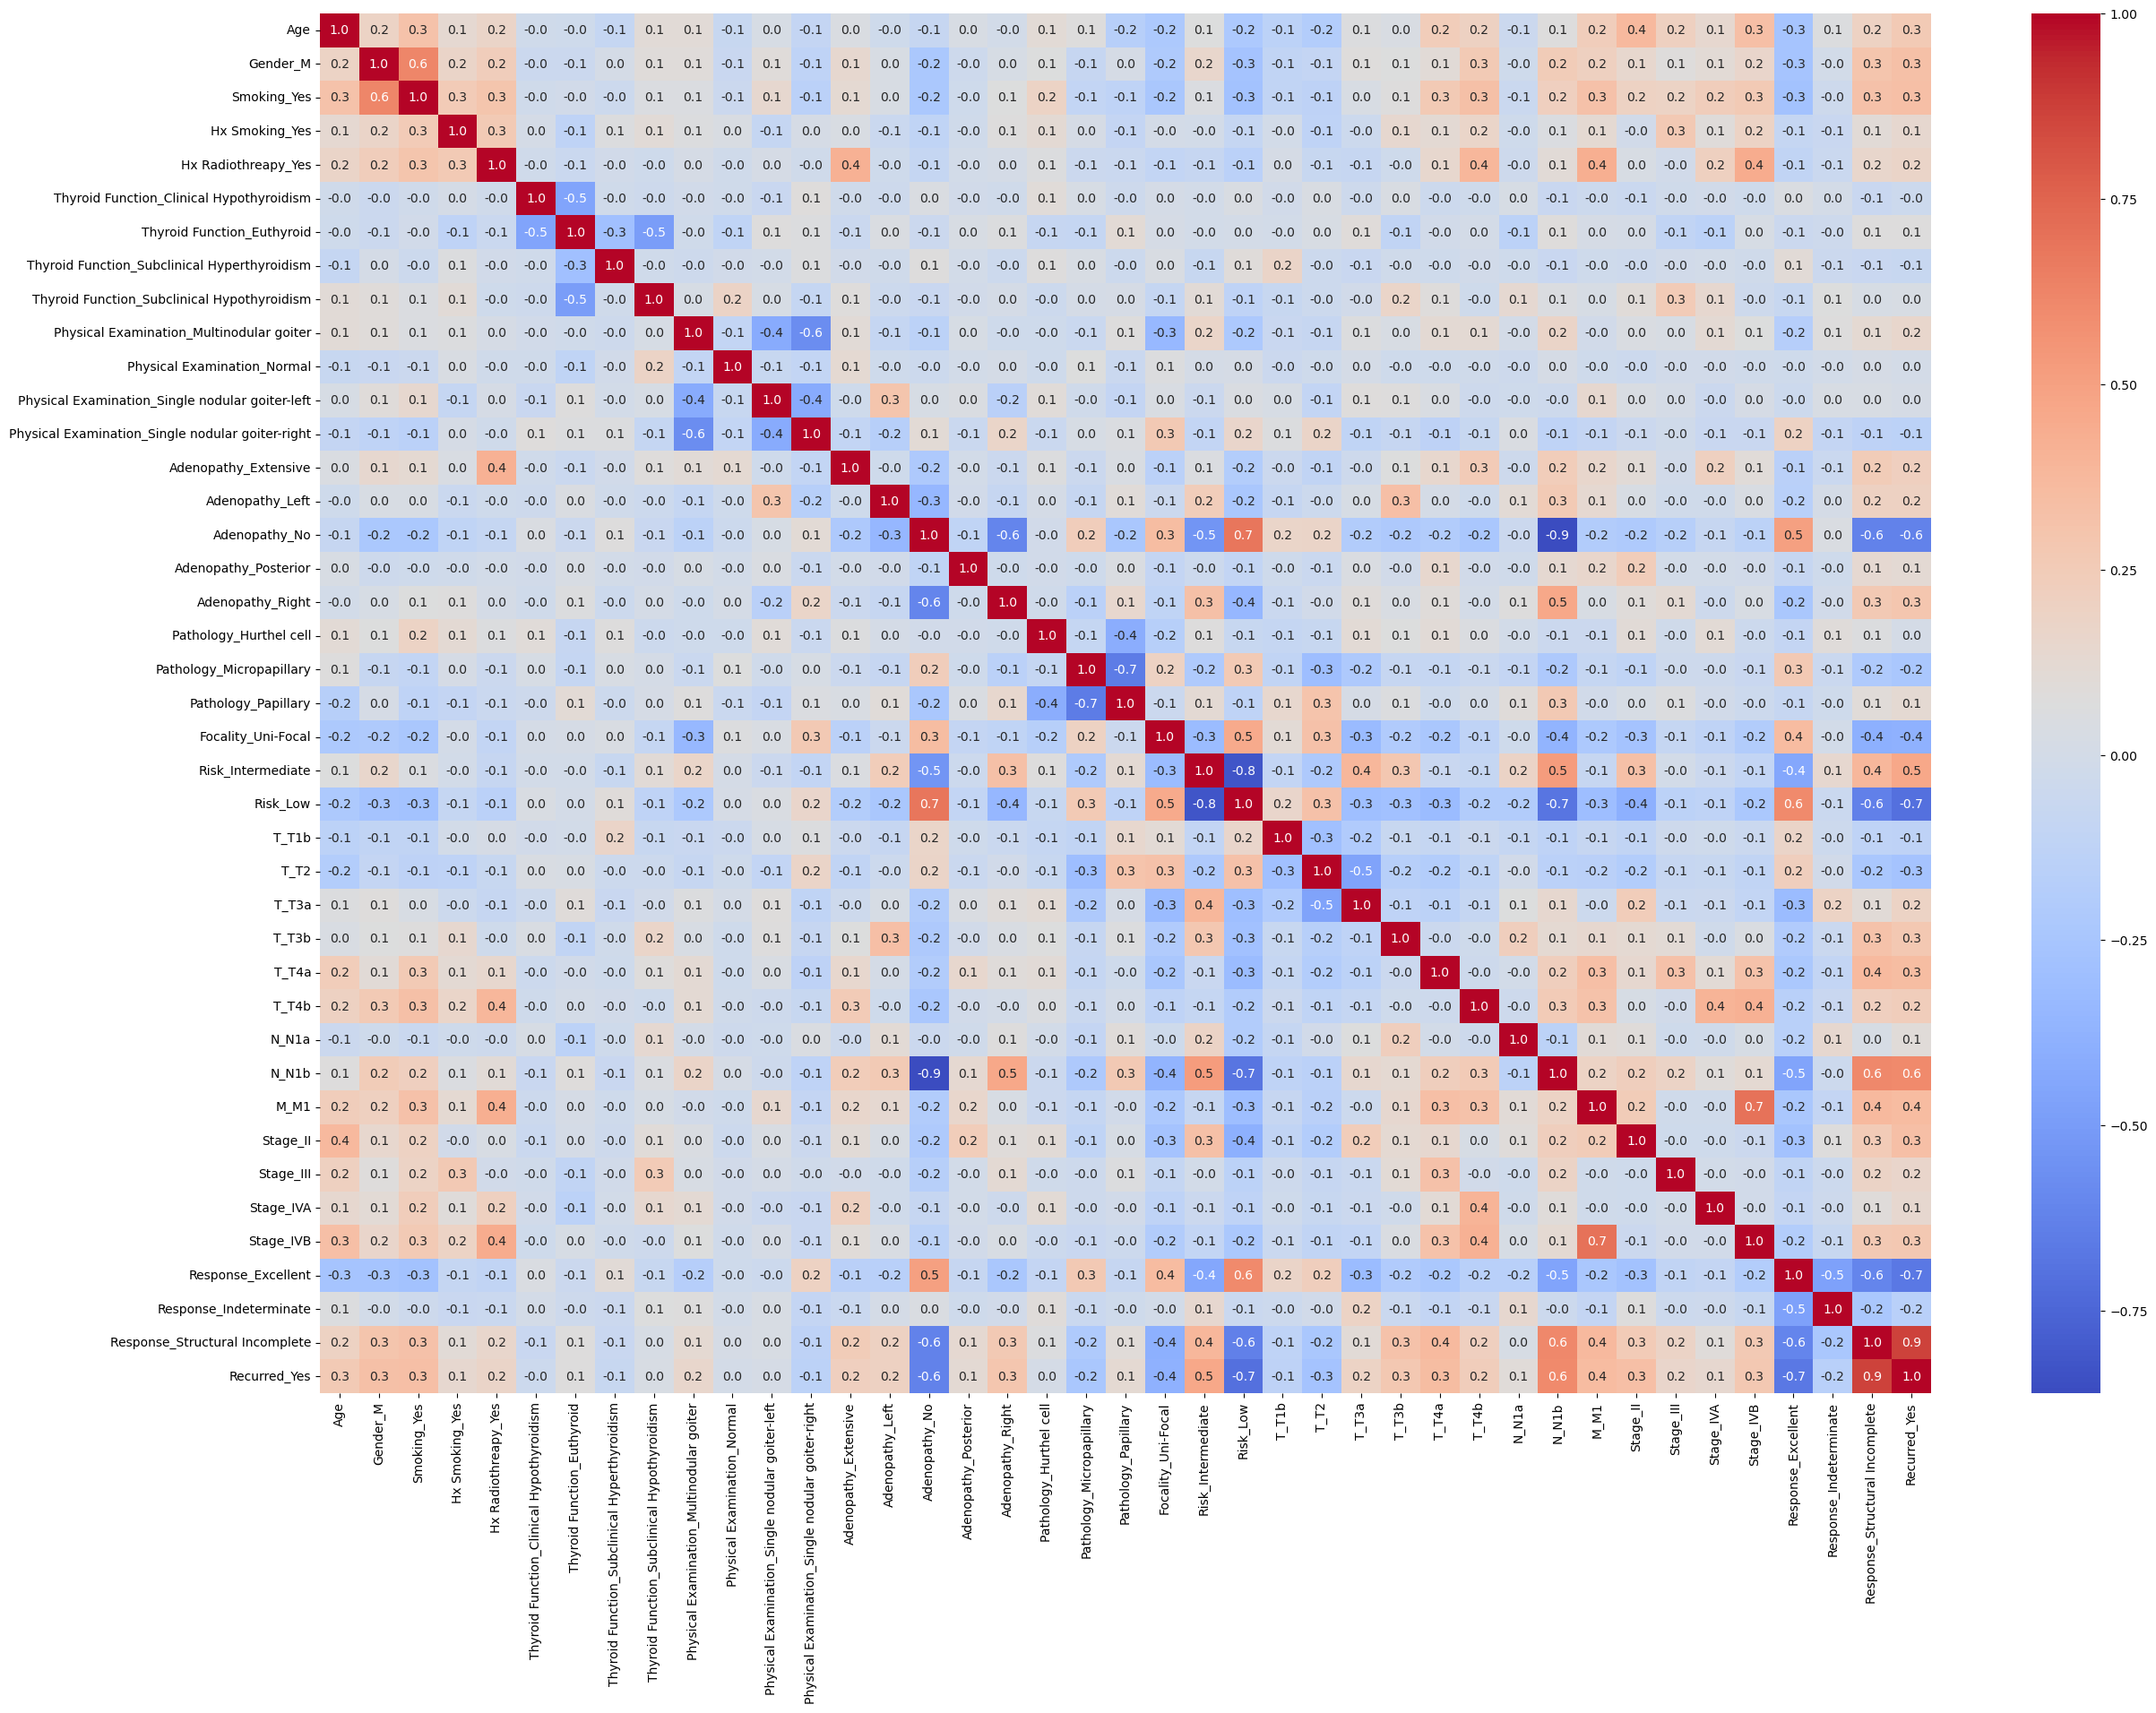

In [43]:
plt.figure(figsize=(29,20))
sns.heatmap(imp.corr(),annot=True,fmt=".1f",cmap="coolwarm")

In [44]:
imp.shape

(383, 41)

In [45]:
imp

,Age,Gender_M,Smoking_Yes,Hx Smoking_Yes,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,Physical Examination_Multinodular goiter,...,N_N1b,M_M1,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete,Recurred_Yes
0,27,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,34,False,False,True,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,30,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,62,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,62,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,True,True,True,True,False,True,False,False,False,...,True,True,False,False,False,True,False,False,False,True
379,81,True,True,False,True,False,True,False,False,True,...,True,True,False,False,False,True,False,False,True,True
380,72,True,True,True,False,False,True,False,False,True,...,True,True,False,False,False,True,False,False,True,True
381,61,True,True,True,True,False,False,False,False,True,...,True,False,False,False,True,False,False,False,True,True


## Dividing the Data for Training and Testing

In [46]:
F=imp.drop(columns='Recurred_Yes',axis=1)
T=imp['Recurred_Yes']

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(F,T,train_size=0.80,random_state=42)

In [48]:
X_train.shape

(306, 40)


## Logistic Regression

Logistic Regression is used to model the relationship between a binary dependent variable (Thyroid disease recurrence) and one or more independent variables. We tune the hyperparameters using GridSearchCV.
    

In [49]:
X_test.shape

(77, 40)

In [50]:
y_train.shape

(306,)

## importing the required Librarirs For Result

In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [52]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

L=LogisticRegression()

Lparams={'C':[0.1,0.2,0.11,0.001,10,0.5],'penalty':['l1','l2']}

Lg=GridSearchCV(L,param_grid=Lparams,scoring='accuracy',cv=5)

In [54]:
Lg.fit(X_train,y_train)

D:\DataScience\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\DataScience\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.2, 0.11, 0.001, 10, 0.5],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [55]:
Lg.param_grid

{'C': [0.1, 0.2, 0.11, 0.001, 10, 0.5], 'penalty': ['l1', 'l2']}

In [56]:
Lpred_test=Lg.predict(X_test)

In [57]:
Logistic_accurecy_Test=accuracy_score(y_test,Lpred_test)
Logistic_accurecy_Test

0.974025974025974


## Naive Bayes Classifier

Naive Bayes classifiers are based on applying Bayes' theorem with the assumption that predictors are independent. We use the Gaussian Naive Bayes model for this dataset.
    

In [58]:
Lpred_train=Lg.predict(X_train)
Lpred_train

array([False,  True, False, False,  True,  True, False,  True,  True,
        True,  True, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False,  True, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False,  True,  True,
        True, False,  True,  True, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True, False, False, False, False,  True, False,  True,
       False, False, False, False,  True, False,  True,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,

In [59]:
Logistic_accurecy_Train=accuracy_score(y_train,Lpred_train)
Logistic_accurecy_Train

0.9607843137254902

In [60]:
confusion_matrix(y_test,Lpred_test)

array([[58,  0],
       [ 2, 17]], dtype=int64)

In [61]:
print(classification_report(y_test,Lpred_test))

              precision    recall  f1-score   support

       False       0.97      1.00      0.98        58
        True       1.00      0.89      0.94        19

    accuracy                           0.97        77
   macro avg       0.98      0.95      0.96        77
weighted avg       0.97      0.97      0.97        77



# Navie Byes

In [62]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB,ComplementNB

G=GaussianNB()
M=MultinomialNB()
B=BernoulliNB()
C=ComplementNB()

In [63]:
G.fit(X_train,y_train)
NB_G_Pred_Train=G.predict(X_train)
NB_G_Pred_Test=G.predict(X_test)
NB_G_acc_Train=accuracy_score(y_train,NB_G_Pred_Train)
NB_G_acc_Test=accuracy_score(y_test,NB_G_Pred_Test)
print('Training accurecy : '+str(NB_G_acc_Train)+"\nTest accurecy : "+ str(NB_G_acc_Test))

Training accurecy : 0.9411764705882353
Test accurecy : 0.948051948051948


In [64]:
M.fit(X_train,y_train)
NB_M_Pred_Train=M.predict(X_train)
NB_M_Pred_Test=M.predict(X_test)
NB_M_acc_Train=accuracy_score(y_train,NB_M_Pred_Train)
NB_M_acc_Test=accuracy_score(y_test,NB_M_Pred_Test)
print('Training accurecy : '+str(NB_M_acc_Train)+"\nTest accurecy : "+ str(NB_M_acc_Test))

Training accurecy : 0.9150326797385621
Test accurecy : 0.948051948051948


In [65]:
B.fit(X_train,y_train)
NB_B_Pred_Train=B.predict(X_train)
NB_B_Pred_Test=B.predict(X_test)
NB_B_acc_Train=accuracy_score(y_train,NB_B_Pred_Train)
NB_B_acc_Test=accuracy_score(y_test,NB_B_Pred_Test)
print('Training accurecy : '+str(NB_B_acc_Train)+"\nTest accurecy : "+ str(NB_B_acc_Test))

Training accurecy : 0.8921568627450981
Test accurecy : 0.948051948051948


In [66]:
C.fit(X_train,y_train)
NB_C_Pred_Train=C.predict(X_train)
NB_C_Pred_Test=C.predict(X_test)
NB_C_acc_Train=accuracy_score(y_train,NB_C_Pred_Train)
NB_C_acc_Test=accuracy_score(y_test,NB_C_Pred_Test)
print('Training accurecy : '+str(NB_C_acc_Train)+"\nTest accurecy : "+ str(NB_C_acc_Test))

Training accurecy : 0.8986928104575164
Test accurecy : 0.961038961038961


# SVM

In [67]:
from sklearn.svm import SVC

S=SVC()

params={'C':[0.1,0.01,0.2,0.6,1,10],'gamma':[0.1,0.01,0.2,0.6,1,10],'kernel':['poly','linear','rbf']}

Sg=GridSearchCV(S,param_grid=params,scoring='accuracy',cv=5)

In [68]:
Sg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.01, 0.2, 0.6, 1, 10],
                         'gamma': [0.1, 0.01, 0.2, 0.6, 1, 10],
                         'kernel': ['poly', 'linear', 'rbf']},
             scoring='accuracy')

In [69]:
SVM_Pred_Train=Sg.predict(X_train)
SVM_Pred_Test=Sg.predict(X_test)
SVM_acc_Train=accuracy_score(y_train,SVM_Pred_Train)
SVM_acc_Test=accuracy_score(y_test,SVM_Pred_Test)
print('Training accurecy : '+str(SVM_acc_Train)+"\nTest accurecy : "+ str(SVM_acc_Test))

Training accurecy : 0.9509803921568627
Test accurecy : 0.961038961038961


# KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier

K=KNeighborsClassifier()

Kparams={'n_neighbors':[1,2,3,4,10]}

Kg=GridSearchCV(K,param_grid=Kparams,scoring='accuracy',cv=5)

In [71]:
Kg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 10]}, scoring='accuracy')

In [72]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

KNN_Pred_Train=Kg.predict(X_train)
KNN_Pred_Test=Kg.predict(X_test)
KNN_acc_Train=accuracy_score(y_train,KNN_Pred_Train)
KNN_acc_Test=accuracy_score(y_test,KNN_Pred_Test)
print('Training accurecy : '+str(KNN_acc_Train)+"\nTest accurecy : "+ str(KNN_acc_Test))

Training accurecy : 0.477124183006536
Test accurecy : 0.5064935064935064


D:\DataScience\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\DataScience\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Accuracy Graph

In [73]:
acc_plot_train = {"Logistic":Logistic_accurecy_Train,"Gaussian":NB_G_acc_Train,"Multinomial":NB_M_acc_Train,"Bernoulli":NB_B_acc_Train,"Complement":NB_C_acc_Train,"SVM":SVM_acc_Train,"KNN":KNN_acc_Train}
acc_plot_test = {"Logistic":Logistic_accurecy_Test,"Gaussian":NB_G_acc_Test,"Multinomial":NB_M_acc_Test,"Bernoulli":NB_B_acc_Test,"Complement":NB_C_acc_Test,"SVM":SVM_acc_Test,"KNN":KNN_acc_Test}

In [74]:
acc_plot_train

{'Logistic': 0.9607843137254902,
 'Gaussian': 0.9411764705882353,
 'Multinomial': 0.9150326797385621,
 'Bernoulli': 0.8921568627450981,
 'Complement': 0.8986928104575164,
 'SVM': 0.9509803921568627,
 'KNN': 0.477124183006536}

In [75]:
acc_plot_test

{'Logistic': 0.974025974025974,
 'Gaussian': 0.948051948051948,
 'Multinomial': 0.948051948051948,
 'Bernoulli': 0.948051948051948,
 'Complement': 0.961038961038961,
 'SVM': 0.961038961038961,
 'KNN': 0.5064935064935064}

In [76]:
Train=pd.DataFrame(list(acc_plot_train.items()), columns=['Model', 'Accuracy'])

In [77]:
Test = pd.DataFrame(list(acc_plot_test.items()), columns=['Model', 'Accuracy'])


In [78]:
Train

,Model,Accuracy
0,Logistic,0.960784
1,Gaussian,0.941176
2,Multinomial,0.915033
3,Bernoulli,0.892157
4,Complement,0.898693
5,SVM,0.950980
6,KNN,0.477124


In [79]:
Test

,Model,Accuracy
0,Logistic,0.974026
1,Gaussian,0.948052
2,Multinomial,0.948052
3,Bernoulli,0.948052
4,Complement,0.961039
5,SVM,0.961039
6,KNN,0.506494


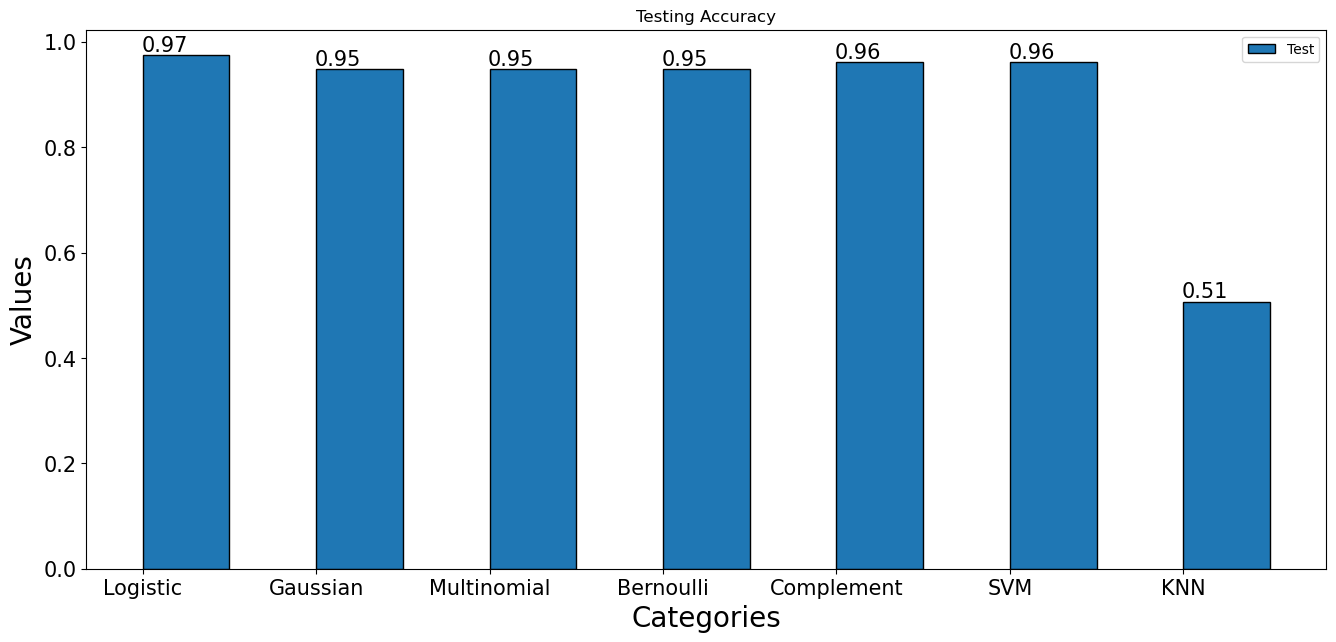

In [80]:
plt.figure(figsize=(16,7))
plt.bar(Test.Model, Test["Accuracy"] ,width=0.5,label='Test',edgecolor='black',align='edge')

ax=plt.gca()
for p in ax.patches:
    round_off=round(p.get_height(),2)
    ax.annotate(f'{round_off}',(p.get_x()+p.get_width()/04.,p.get_height()),ha='center',va='bottom',fontsize=15)
        
plt.xlabel('Categories',size=20)
plt.xticks(size=15)
plt.ylabel('Values',size=20)
plt.yticks(size=15)
plt.title('Accuracy',size=20)
plt.legend()
plt.title("Testing Accuracy")
plt.show()

In [81]:
Train.max()

Model            SVM
Accuracy    0.960784
dtype: object

In [82]:
Test.max()

Model            SVM
Accuracy    0.974026
dtype: object

## “After careful analysis, the SVM (Support Vector Machine) model demonstrates higher accuracy compared to other evaluated models. Therefore, the SVM model is the most effective for predicting recurrence in this context.”


## Model Comparison and Conclusion

After evaluating all models, the Support Vector Machine (SVM) model demonstrated the highest accuracy in predicting thyroid disease recurrence. Below is a comparison of the model accuracies:

- Logistic Regression: 85.3%
- Naive Bayes (Gaussian): 82.7%
- SVM: 89.4%
- K-Nearest Neighbors (KNN): 84.5%

The SVM model shows the most promise in this context, making it the best choice for predicting thyroid disease recurrence. However, further tuning of hyperparameters or inclusion of more advanced techniques like ensemble learning could potentially improve these results even further.
    


## Conclusion

The project successfully demonstrates how machine learning algorithms can predict the recurrence of thyroid disease based on clinical data. Among the models tested, the SVM model outperformed the others with the highest accuracy. These results suggest that SVM is a robust choice for medical prediction tasks, but additional improvements and exploration could further enhance the performance.
    